<a href="https://colab.research.google.com/github/sultanbst123/Kaggle_NCAA-March-Machine-Learning-Mania-2022/blob/main/NCAA_March_Machine_Learning_Mania_2022_Men%E2%80%99s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>(NCAA)March Machine Learning Mania 2022 - Man’s</h1>

## Library and File

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:

import numpy as np
import pandas as pd 

import os 
import re
import gdown
from zipfile import ZipFile

import seaborn as sns 
import matplotlib.pyplot as plt 

import lightgbm
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# untuk outlier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import log_loss # evaluation 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
with ZipFile("/content/drive/MyDrive/March Machine Learning Mania 2022-man/mens-march-mania-2022.zip", "r") as zipobj:
     zipobj.extractall("NCAA file")

In [ ]:

# check semua file
os.listdir("/content/NCAA file/MDataFiles_Stage1")

['MGameCities.csv',
 'MTeamCoaches.csv',
 'Conferences.csv',
 'MNCAATourneySlots.csv',
 'MNCAATourneySeeds.csv',
 'MSecondaryTourneyTeams.csv',
 'MTeamConferences.csv',
 'MTeams.csv',
 'MMasseyOrdinals.csv',
 'MConferenceTourneyGames.csv',
 'MSecondaryTourneyCompactResults.csv',
 'Cities.csv',
 'MSampleSubmissionStage1.csv',
 'MNCAATourneyDetailedResults.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MSeasons.csv',
 'MRegularSeasonCompactResults.csv',
 'MNCAATourneyCompactResults.csv',
 'MRegularSeasonDetailedResults.csv',
 'MTeamSpellings.csv']

In [ ]:
# lihat semua data

## Data section 1

### MTeams

In [ ]:
MTeams = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MTeams.csv")

In [ ]:
MTeams.sample(7)

,TeamID,TeamName,FirstD1Season,LastD1Season
339,1440,VMI,1985,2022
35,1136,Bryant,2009,2022
215,1316,North Florida,2006,2022
267,1368,SE Louisiana,1985,2022
202,1303,NE Omaha,2012,2022
182,1283,Missouri St,1985,2022
68,1169,CS Northridge,1991,2022


In [ ]:
MTeams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TeamID         372 non-null    int64 
 1   TeamName       372 non-null    object
 2   FirstD1Season  372 non-null    int64 
 3   LastD1Season   372 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.8+ KB


In [ ]:
MTeams.describe(include="all")

,TeamID,TeamName,FirstD1Season,LastD1Season
count,372.000000,372,372.000000,372.000000
unique,NaN,372,NaN,NaN
top,NaN,Abilene Chr,NaN,NaN
freq,NaN,1,NaN,NaN
mean,1286.500000,NaN,1988.887097,2021.053763
std,107.531391,NaN,8.469902,5.216324
min,1101.000000,NaN,1985.000000,1985.000000
25%,1193.750000,NaN,1985.000000,2022.000000
50%,1286.500000,NaN,1985.000000,2022.000000
75%,1379.250000,NaN,1985.000000,2022.000000


In [ ]:
# check nilai jumlah nilai 
MTeams.nunique()

TeamID           372
TeamName         372
FirstD1Season     29
LastD1Season      13
dtype: int64

###MSeasons

In [ ]:
MSeasons = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MSeasons.csv")

In [ ]:
MSeasons.sample(7)

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
11,1996,1995-10-30 00:00:00,East,Midwest,Southeast,West
30,2015,2014-11-03 00:00:00,East,South,Midwest,West
6,1991,1990-10-29 00:00:00,East,Southeast,Midwest,West
13,1998,1997-10-27 00:00:00,East,West,Midwest,South
23,2008,2007-11-05 00:00:00,East,Midwest,South,West
5,1990,1989-10-30 00:00:00,East,Midwest,Southeast,West
26,2011,2010-11-01 00:00:00,East,West,Southeast,Southwest


In [ ]:
MSeasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   38 non-null     int64 
 1   DayZero  38 non-null     object
 2   RegionW  38 non-null     object
 3   RegionX  38 non-null     object
 4   RegionY  38 non-null     object
 5   RegionZ  38 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.9+ KB


In [ ]:
MSeasons.describe(include="all")

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
count,38.000000,38,38,38,38,38
unique,NaN,38,5,9,8,9
top,NaN,1984-10-29 00:00:00,East,Midwest,Midwest,West
freq,NaN,1,33,11,21,23
mean,2003.500000,NaN,NaN,NaN,NaN,NaN
std,11.113055,NaN,NaN,NaN,NaN,NaN
min,1985.000000,NaN,NaN,NaN,NaN,NaN
25%,1994.250000,NaN,NaN,NaN,NaN,NaN
50%,2003.500000,NaN,NaN,NaN,NaN,NaN
75%,2012.750000,NaN,NaN,NaN,NaN,NaN


###MNCAATourneySeeds

In [ ]:
MNCAATourneySeeds = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneySeeds.csv")

In [ ]:
MNCAATourneySeeds.sample(7)

,Season,Seed,TeamID
789,1997,X06,1228
212,1988,X05,1177
1095,2002,W07,1301
1734,2011,Z10,1199
641,1995,W02,1269
187,1987,Z12,1461
979,2000,X04,1397


In [ ]:
MNCAATourneySeeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2354 non-null   int64 
 1   Seed    2354 non-null   object
 2   TeamID  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [ ]:
MNCAATourneySeeds.describe(include="all")

,Season,Seed,TeamID
count,2354.000000,2354,2354.000000
unique,NaN,90,NaN
top,NaN,W01,NaN
freq,NaN,36,NaN
mean,2002.762532,NaN,1291.574766
std,10.475078,NaN,103.315557
min,1985.000000,NaN,1101.000000
25%,1994.000000,NaN,1208.250000
50%,2003.000000,NaN,1287.000000
75%,2012.000000,NaN,1387.000000


###MRegularSeasonCompactResults

In [ ]:
MRegularSeasonCompactResults = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MRegularSeasonCompactResults.csv")

In [ ]:
MRegularSeasonCompactResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
124516,2013,16,1318,61,1415,52,N,0
12064,1988,40,1397,74,1425,61,A,0
119966,2012,40,1207,62,1224,48,H,0
123768,2012,128,1426,96,1311,48,N,0
152343,2018,47,1433,85,1137,79,H,0
120551,2012,58,1329,68,1374,58,N,2
165891,2020,106,1199,82,1338,67,H,0


In [ ]:
MRegularSeasonCompactResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174471 entries, 0 to 174470
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   174471 non-null  int64 
 1   DayNum   174471 non-null  int64 
 2   WTeamID  174471 non-null  int64 
 3   WScore   174471 non-null  int64 
 4   LTeamID  174471 non-null  int64 
 5   LScore   174471 non-null  int64 
 6   WLoc     174471 non-null  object
 7   NumOT    174471 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 10.6+ MB


In [ ]:
MRegularSeasonCompactResults.describe(include="all")

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
count,174471.000000,174471.000000,174471.000000,174471.000000,174471.000000,174471.000000,174471,174471.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,103419,NaN
mean,2004.535510,74.056049,1287.158210,76.762975,1282.772231,64.663577,NaN,0.046758
std,10.728009,33.821333,104.644657,11.959181,104.750998,11.276145,NaN,0.254095
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,NaN,0.000000
25%,1995.000000,47.000000,1198.000000,69.000000,1191.000000,57.000000,NaN,0.000000
50%,2005.000000,76.000000,1285.000000,76.000000,1281.000000,64.000000,NaN,0.000000
75%,2014.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,NaN,0.000000


###MNCAATourneyCompactResults

In [ ]:
MNCAATourneyCompactResults = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneyCompactResults.csv")

In [ ]:
MNCAATourneyCompactResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1948,2015,137,1438,79,1125,67,N,0
753,1996,152,1246,81,1269,74,N,0
1139,2003,136,1141,79,1166,73,N,0
1180,2003,139,1268,77,1462,64,N,0
579,1994,136,1400,91,1443,77,N,0
974,2000,137,1396,73,1248,47,N,0
1986,2016,135,1276,67,1409,62,N,0


In [ ]:
MNCAATourneyCompactResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2317 non-null   int64 
 1   DayNum   2317 non-null   int64 
 2   WTeamID  2317 non-null   int64 
 3   WScore   2317 non-null   int64 
 4   LTeamID  2317 non-null   int64 
 5   LScore   2317 non-null   int64 
 6   WLoc     2317 non-null   object
 7   NumOT    2317 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 144.9+ KB


In [ ]:
MNCAATourneyCompactResults.describe(include="all")

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
count,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317,2317.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2317,NaN
mean,2002.758308,139.167890,1286.536901,76.891239,1292.018127,65.168321,NaN,0.069055
std,10.471044,4.217412,100.988726,11.836804,103.292844,11.064350,NaN,0.282592
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000,NaN,0.000000
25%,1994.000000,136.000000,1210.000000,69.000000,1209.000000,58.000000,NaN,0.000000
50%,2003.000000,137.000000,1276.000000,76.000000,1290.000000,65.000000,NaN,0.000000
75%,2012.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000,NaN,0.000000


###MSampleSubmissionStage1

In [ ]:
MSampleSubmissionStage1 = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MSampleSubmissionStage1.csv")

In [ ]:
MSampleSubmissionStage1.sample(7)

,ID,Pred
4672,2018_1112_1393,0.5
8619,2019_1297_1314,0.5
8784,2019_1318_1458,0.5
9306,2021_1111_1452,0.5
5609,2018_1211_1222,0.5
11068,2021_1329_1345,0.5
9048,2019_1414_1433,0.5


In [ ]:
MSampleSubmissionStage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11390 entries, 0 to 11389
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      11390 non-null  object 
 1   Pred    11390 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.1+ KB


## Data section 2

###MRegularSeasonDetailedResults

In [ ]:
MRegularSeasonDetailedResults = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv")

In [ ]:
MRegularSeasonDetailedResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
64119,2015,93,1156,73,1464,60,H,0,24,55,8,19,17,23,10,26,17,10,8,5,16,24,55,4,12,8,15,8,23,14,13,9,0,14
14590,2006,33,1252,56,1190,54,A,0,20,63,6,30,10,24,28,23,10,16,8,1,24,21,47,2,13,10,24,9,25,8,16,6,2,18
22280,2007,99,1304,61,1403,59,A,0,20,46,10,26,11,14,7,21,11,13,5,1,14,22,50,7,20,8,8,7,20,15,12,3,0,12
54110,2013,106,1303,79,1152,75,H,0,25,52,10,21,19,25,8,21,17,13,6,2,10,32,66,6,16,5,9,16,22,17,16,8,4,19
5550,2004,41,1453,86,1442,69,A,0,33,49,6,9,14,21,7,18,22,17,10,2,23,22,45,6,18,19,28,10,14,16,21,7,0,20
44245,2011,123,1156,73,1460,59,N,0,19,40,9,19,26,30,6,27,9,15,7,0,18,17,47,6,20,19,24,6,16,8,11,5,0,19
3990,2003,115,1254,87,1447,71,H,0,35,68,6,20,11,14,12,31,16,11,6,6,11,29,70,7,18,6,10,12,24,12,12,5,1,17


In [ ]:
MRegularSeasonDetailedResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100423 entries, 0 to 100422
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   100423 non-null  int64 
 1   DayNum   100423 non-null  int64 
 2   WTeamID  100423 non-null  int64 
 3   WScore   100423 non-null  int64 
 4   LTeamID  100423 non-null  int64 
 5   LScore   100423 non-null  int64 
 6   WLoc     100423 non-null  object
 7   NumOT    100423 non-null  int64 
 8   WFGM     100423 non-null  int64 
 9   WFGA     100423 non-null  int64 
 10  WFGM3    100423 non-null  int64 
 11  WFGA3    100423 non-null  int64 
 12  WFTM     100423 non-null  int64 
 13  WFTA     100423 non-null  int64 
 14  WOR      100423 non-null  int64 
 15  WDR      100423 non-null  int64 
 16  WAst     100423 non-null  int64 
 17  WTO      100423 non-null  int64 
 18  WStl     100423 non-null  int64 
 19  WBlk     100423 non-null  int64 
 20  WPF      100423 non-null  int64 
 21  LFGM     1

In [ ]:
MRegularSeasonDetailedResults.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000
mean,2012.489350,70.513169,1287.600341,75.549396,1282.113341,63.548978,0.068311,26.228991,55.458122,7.218227,18.927069,15.873196,22.297083,10.669667,25.756829,14.712695,12.874202,6.983868,3.799120,16.880814,22.665146,56.574281,6.128994,19.849148,12.089611,17.841909,10.824004,21.714886,11.415582,14.196698,6.000040,2.864951,19.076546
std,5.564818,35.408043,104.947734,11.059565,104.123614,10.894962,0.305483,4.688120,7.526434,3.095434,5.927677,6.245465,8.119103,4.142087,4.910566,4.411885,4.006917,3.107018,2.441147,4.950588,4.364286,7.627384,2.795085,6.029684,5.356261,7.123095,4.221449,4.544578,3.728140,4.385896,2.753956,2.026886,5.483882
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,40.000000,1198.000000,68.000000,1191.000000,56.000000,0.000000,23.000000,50.000000,5.000000,15.000000,11.000000,17.000000,8.000000,22.000000,12.000000,10.000000,5.000000,2.000000,14.000000,20.000000,51.000000,4.000000,16.000000,8.000000,13.000000,8.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2013.000000,73.000000,1286.000000,75.000000,1281.000000,63.000000,0.000000,26.000000,55.000000,7.000000,19.000000,15.000000,22.000000,10.000000,26.000000,14.000000,13.000000,7.000000,3.000000,17.000000,23.000000,56.000000,6.000000,19.000000,12.000000,17.000000,10.000000,22.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2017.000000,101.000000,1380.000000,83.000000,1373.000000,71.000000,0.000000,29.000000,60.000000,9.000000,23.000000,20.000000,28.000000,13.000000,29.000000,17.000000,15.000000,9.000000,5.000000,20.000000,25.000000,61.000000,8.000000,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2022.000000,132.000000,1472.000000,144.000000,1472.000000,140.000000,6.000000,57.000000,103.000000,26.000000,56.000000,48.000000,67.000000,38.000000,54.000000,41.000000,33.000000,26.000000,21.000000,41.000000,47.000000,106.000000,22.000000,59.000000,42.000000,61.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


###MNCAATourneyDetailedResults

In [ ]:
MNCAATourneyDetailedResults = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv")

In [ ]:
MNCAATourneyDetailedResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
356,2008,138,1417,51,1401,49,N,0,19,44,6,18,7,11,8,21,7,14,7,11,16,22,51,2,10,3,7,10,19,12,11,2,2,15
766,2014,143,1173,82,1390,72,N,0,28,58,8,23,18,26,10,25,19,10,8,1,25,22,58,5,21,23,33,15,20,10,12,7,5,24
151,2005,137,1257,68,1418,62,N,0,22,57,6,22,18,27,16,20,12,11,5,2,19,24,53,4,12,10,18,13,24,14,18,7,0,21
222,2006,137,1400,60,1335,52,N,0,18,45,2,10,22,26,14,28,7,11,4,6,14,17,53,10,27,8,13,11,10,10,8,4,1,20
1004,2018,137,1155,79,1308,68,N,0,33,59,6,14,7,9,3,28,11,8,6,4,18,24,62,9,25,11,17,8,25,16,11,3,1,13
163,2005,138,1246,69,1153,60,N,0,25,49,7,12,12,18,7,29,16,15,7,5,17,20,61,7,26,13,19,16,21,10,10,4,4,19
691,2013,139,1195,81,1361,71,N,0,33,59,7,18,8,12,9,22,21,13,13,5,13,27,61,8,23,9,13,14,20,16,17,10,6,11


In [ ]:
MNCAATourneyDetailedResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   1181 non-null   int64 
 1   DayNum   1181 non-null   int64 
 2   WTeamID  1181 non-null   int64 
 3   WScore   1181 non-null   int64 
 4   LTeamID  1181 non-null   int64 
 5   LScore   1181 non-null   int64 
 6   WLoc     1181 non-null   object
 7   NumOT    1181 non-null   int64 
 8   WFGM     1181 non-null   int64 
 9   WFGA     1181 non-null   int64 
 10  WFGM3    1181 non-null   int64 
 11  WFGA3    1181 non-null   int64 
 12  WFTM     1181 non-null   int64 
 13  WFTA     1181 non-null   int64 
 14  WOR      1181 non-null   int64 
 15  WDR      1181 non-null   int64 
 16  WAst     1181 non-null   int64 
 17  WTO      1181 non-null   int64 
 18  WStl     1181 non-null   int64 
 19  WBlk     1181 non-null   int64 
 20  WPF      1181 non-null   int64 
 21  LFGM     1181 non-null   int64 
 22  

In [ ]:
MNCAATourneyDetailedResults.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,2011.650296,139.109229,1293.542760,75.234547,1294.587638,63.707028,0.071126,26.344623,55.462320,7.022862,18.298899,15.522439,21.328535,10.523285,25.861135,14.259949,11.447925,6.392887,3.944962,16.324301,22.911939,57.712108,6.254022,20.502964,11.629128,16.617273,10.970364,21.368332,11.409822,12.171041,5.707875,2.939881,18.853514
std,5.274224,4.234734,102.884842,10.724755,105.945614,10.305693,0.294045,4.751158,7.225518,2.965677,5.679989,6.059217,7.681727,3.978822,5.002307,4.341092,3.812563,2.977842,2.526038,3.860358,4.104239,7.300343,2.761999,5.826098,5.114416,6.609636,4.215384,4.463864,3.641061,3.920983,2.670336,2.045817,4.232007
min,2003.000000,134.000000,1101.000000,47.000000,1101.000000,29.000000,0.000000,13.000000,34.000000,0.000000,4.000000,0.000000,1.000000,0.000000,13.000000,3.000000,2.000000,0.000000,0.000000,5.000000,11.000000,37.000000,0.000000,5.000000,0.000000,2.000000,1.000000,8.000000,2.000000,3.000000,0.000000,0.000000,7.000000
25%,2007.000000,136.000000,1211.000000,68.000000,1210.000000,57.000000,0.000000,23.000000,51.000000,5.000000,14.000000,11.000000,16.000000,8.000000,22.000000,11.000000,9.000000,4.000000,2.000000,14.000000,20.000000,53.000000,4.000000,16.000000,8.000000,12.000000,8.000000,18.000000,9.000000,9.000000,4.000000,1.000000,16.000000
50%,2012.000000,137.000000,1277.000000,75.000000,1295.000000,63.000000,0.000000,26.000000,55.000000,7.000000,18.000000,15.000000,21.000000,10.000000,26.000000,14.000000,11.000000,6.000000,4.000000,16.000000,23.000000,58.000000,6.000000,20.000000,11.000000,16.000000,11.000000,21.000000,11.000000,12.000000,6.000000,3.000000,19.000000
75%,2016.000000,139.000000,1393.000000,82.000000,1393.000000,71.000000,0.000000,29.000000,60.000000,9.000000,22.000000,19.000000,26.000000,13.000000,29.000000,17.000000,14.000000,8.000000,5.000000,19.000000,26.000000,63.000000,8.000000,24.000000,15.000000,21.000000,14.000000,24.000000,14.000000,15.000000,7.000000,4.000000,22.000000
max,2021.000000,154.000000,1463.000000,121.000000,1463.000000,105.000000,2.000000,44.000000,84.000000,18.000000,41.000000,38.000000,48.000000,26.000000,43.000000,29.000000,28.000000,20.000000,15.000000,30.000000,36.000000,85.000000,18.000000,42.000000,31.000000,39.000000,29.000000,42.000000,23.000000,27.000000,19.000000,13.000000,33.000000


## Data section 3

###Cities

In [ ]:
Cities = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/Cities.csv")

In [ ]:
Cities.sample(7)

,CityID,City,State
332,4334,Statesboro,GA
239,4240,Newark,DE
116,4117,Fargo,ND
437,4460,Mansfield,CT
300,4301,Salt Lake City,UT
450,4473,St. James,JA
375,4383,Guaynabo,PR


In [ ]:
Cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CityID  463 non-null    int64 
 1   City    463 non-null    object
 2   State   463 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.0+ KB


In [ ]:
Cities.describe(include="all")

,CityID,City,State
count,463.00000,463,463
unique,NaN,435,63
top,NaN,Springfield,NY
freq,NaN,4,31
mean,4236.00432,NaN,NaN
std,139.54096,NaN,NaN
min,4001.00000,NaN,NaN
25%,4116.50000,NaN,NaN
50%,4232.00000,NaN,NaN
75%,4348.50000,NaN,NaN


###MGameCities

In [ ]:
MGameCities = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MGameCities.csv")

In [ ]:
MGameCities.sample(7)

,Season,DayNum,WTeamID,LTeamID,CRType,CityID
43725,2018,11,1213,1197,Regular,4267
66912,2022,81,1264,1373,Regular,4045
29016,2015,55,1320,1355,Regular,4058
34101,2016,42,1167,1171,Regular,4021
47118,2018,89,1170,1340,Regular,4274
54115,2019,117,1308,1152,Regular,4071
64850,2022,22,1245,1203,Regular,4484


In [ ]:
MGameCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67846 entries, 0 to 67845
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   67846 non-null  int64 
 1   DayNum   67846 non-null  int64 
 2   WTeamID  67846 non-null  int64 
 3   LTeamID  67846 non-null  int64 
 4   CRType   67846 non-null  object
 5   CityID   67846 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.1+ MB


## Data section 4

###MMasseyOrdinals

In [ ]:
MMasseyOrdinals = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MMasseyOrdinals.csv")

In [ ]:
MMasseyOrdinals.sample(7)

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
550724,2007,51,MOR,1403,49
1150600,2010,92,DUN,1222,90
2977161,2017,65,RT,1393,67
4250224,2021,100,TRP,1450,119
1184896,2010,106,MOR,1284,288
2219623,2014,107,RPI,1440,246
2418670,2015,79,7OT,1348,102


In [ ]:
MMasseyOrdinals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521720 entries, 0 to 4521719
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Season         int64 
 1   RankingDayNum  int64 
 2   SystemName     object
 3   TeamID         int64 
 4   OrdinalRank    int64 
dtypes: int64(4), object(1)
memory usage: 172.5+ MB


In [ ]:
MMasseyOrdinals.describe()

,Season,RankingDayNum,TeamID,OrdinalRank
count,4.521720e+06,4.521720e+06,4.521720e+06,4.521720e+06
mean,2.013779e+03,8.540504e+01,1.284713e+03,1.722995e+02
std,5.234846e+00,3.252549e+01,1.045467e+02,1.006940e+02
min,2.003000e+03,0.000000e+00,1.101000e+03,1.000000e+00
25%,2.010000e+03,5.800000e+01,1.194000e+03,8.500000e+01
50%,2.014000e+03,8.600000e+01,1.283000e+03,1.720000e+02
75%,2.018000e+03,1.140000e+02,1.376000e+03,2.590000e+02
max,2.022000e+03,1.330000e+02,1.472000e+03,3.580000e+02


In [ ]:
MMasseyOrdinals.OrdinalRank.nlargest(5)

4340196    358
4340561    358
4340937    358
4341295    358
4341653    358
Name: OrdinalRank, dtype: int64

## Data section 5

###MTeamCoaches

In [ ]:
MTeamCoaches = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MTeamCoaches.csv")

In [ ]:
MTeamCoaches.sample(7)

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
8070,2010,1358,0,154,bob_marlin
823,1987,1418,0,154,marty_fletcher
3532,1996,1431,0,154,don_haskins
8899,2013,1133,0,154,geno_ford
6420,2005,1430,0,154,dick_hunsaker
2386,1993,1153,0,154,bob_huggins
9515,2014,1401,0,154,billy_kennedy


In [ ]:
MTeamCoaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12424 entries, 0 to 12423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       12424 non-null  int64 
 1   TeamID       12424 non-null  int64 
 2   FirstDayNum  12424 non-null  int64 
 3   LastDayNum   12424 non-null  int64 
 4   CoachName    12424 non-null  object
dtypes: int64(4), object(1)
memory usage: 485.4+ KB


In [ ]:
MTeamCoaches.describe(include="all")

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
count,12424.000000,12424.000000,12424.000000,12424.000000,12424
unique,NaN,NaN,NaN,NaN,1509
top,NaN,NaN,NaN,NaN,jim_boeheim
freq,NaN,NaN,NaN,NaN,38
mean,2004.314392,1284.766420,0.660898,151.612524,NaN
std,10.902169,104.998662,7.271831,12.469668,NaN
min,1985.000000,1101.000000,0.000000,20.000000,NaN
25%,1995.000000,1193.000000,0.000000,154.000000,NaN
50%,2005.000000,1283.000000,0.000000,154.000000,NaN
75%,2014.000000,1378.000000,0.000000,154.000000,NaN


###Conferences

In [ ]:
Conferences = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/Conferences.csv")

In [ ]:
Conferences.sample(7)

,ConfAbbrev,Description
30,mid_cont,Mid-Continent Conference
42,sec,Southeastern Conference
21,gsc,Gulf Star Conference
38,pac_ten,Pacific-10 Conference
36,nec,Northeast Conference
32,mw_city,Midwestern City Conference
1,a_ten,Atlantic 10 Conference


In [ ]:
Conferences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ConfAbbrev   51 non-null     object
 1   Description  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


###MTeamConferences

In [ ]:
MTeamConferences = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MTeamConferences.csv")

In [ ]:
MTeamConferences.sample(7)

,Season,TeamID,ConfAbbrev
7723,2009,1438,acc
3628,1997,1222,cusa
4300,1999,1288,meac
6530,2006,1255,ind
7276,2008,1335,ivy
3701,1997,1309,sun_belt
1811,1991,1202,southern


In [ ]:
MTeamConferences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      12299 non-null  int64 
 1   TeamID      12299 non-null  int64 
 2   ConfAbbrev  12299 non-null  object
dtypes: int64(2), object(1)
memory usage: 288.4+ KB


###MConferenceTourneyGames

In [ ]:
MConferenceTourneyGames = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MConferenceTourneyGames.csv")

In [ ]:
MConferenceTourneyGames.sample(7)

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
4873,2019,a_ten,129,1387,1350
4503,2017,sec,130,1435,1196
1128,2005,mac,126,1325,1267
4807,2018,southern,124,1202,1441
3118,2012,sun_belt,127,1443,1317
4074,2016,big_twelve,128,1395,1403
3105,2012,summit,125,1442,1295


In [ ]:
MConferenceTourneyGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      5583 non-null   int64 
 1   ConfAbbrev  5583 non-null   object
 2   DayNum      5583 non-null   int64 
 3   WTeamID     5583 non-null   int64 
 4   LTeamID     5583 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 218.2+ KB


### MSecondaryTourneyTeams

In [ ]:
MSecondaryTourneyTeams = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MSecondaryTourneyTeams.csv")

In [ ]:
MSecondaryTourneyTeams.sample(7)

,Season,SecondaryTourney,TeamID
1306,2015,CIT,1313
511,2000,NIT,1462
1297,2015,CIT,1271
917,2010,NIT,1279
1143,2013,NIT,1273
1303,2015,NIT,1300
467,1999,NIT,1332


In [ ]:
MSecondaryTourneyTeams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1666 non-null   int64 
 1   SecondaryTourney  1666 non-null   object
 2   TeamID            1666 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.2+ KB


###MSecondaryTourneyCompactResults

In [ ]:
MSecondaryTourneyCompactResults = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MSecondaryTourneyCompactResults.csv")

In [ ]:
MSecondaryTourneyCompactResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
1491,2018,134,1323,84,1214,63,H,0,NIT
155,1989,143,1412,85,1163,79,A,0,NIT
272,1993,140,1130,101,1349,68,H,0,NIT
143,1989,135,1458,63,1309,61,H,0,NIT
708,2006,134,1390,65,1438,49,H,0,NIT
970,2011,135,1274,85,1194,62,H,0,NIT
963,2011,134,1325,65,1267,64,A,0,CIT


In [ ]:
MSecondaryTourneyCompactResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1647 non-null   int64 
 1   DayNum            1647 non-null   int64 
 2   WTeamID           1647 non-null   int64 
 3   WScore            1647 non-null   int64 
 4   LTeamID           1647 non-null   int64 
 5   LScore            1647 non-null   int64 
 6   WLoc              1647 non-null   object
 7   NumOT             1647 non-null   int64 
 8   SecondaryTourney  1647 non-null   object
dtypes: int64(7), object(2)
memory usage: 115.9+ KB


###MTeamSpellings

In [ ]:
MTeamSpellings = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MTeamSpellings.csv")

UnicodeDecodeError: ignored

###MNCAATourneySlots

In [ ]:
MNCAATourneySlots = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneySlots.csv")

In [ ]:
MNCAATourneySlots.sample(7)

,Season,Slot,StrongSeed,WeakSeed
1102,2002,R1Z7,Z07,Z10
925,1999,R2Y4,R1Y4,R1Y5
2208,2019,R1Z1,Z01,Z16
981,2000,R2X1,R1X1,R1X8
1081,2002,R1X2,X02,X15
2075,2017,R1Z2,Z02,Z15
1831,2013,R3W2,R2W2,R2W3


In [ ]:
MNCAATourneySlots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      2318 non-null   int64 
 1   Slot        2318 non-null   object
 2   StrongSeed  2318 non-null   object
 3   WeakSeed    2318 non-null   object
dtypes: int64(1), object(3)
memory usage: 72.6+ KB


###MNCAATourneySeedRoundSlots

In [ ]:
MNCAATourneySeedRoundSlots = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv")

In [ ]:
MNCAATourneySeedRoundSlots.sample(7)

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
218,X07,3,R3X2,143,144
433,Y11b,0,Y11,134,135
62,W11,3,R3W2,143,144
85,W12,6,R6CH,154,154
33,W06,4,R4W1,145,146
672,Z14a,6,R6CH,154,154
89,W12a,3,R3W1,143,144


In [ ]:
MNCAATourneySeedRoundSlots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Seed         720 non-null    object
 1   GameRound    720 non-null    int64 
 2   GameSlot     720 non-null    object
 3   EarlyDayNum  720 non-null    int64 
 4   LateDayNum   720 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 28.2+ KB


## Ambil data yang penting untuk melakukan rekayasa fitur

In [ ]:
df_seeds = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneySeeds.csv")

In [ ]:
df_season_results = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv")

In [ ]:

# drop feature di season result
df_season_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [ ]:
df_season_results['ScoreMargin'] = df_season_results['WScore'] - df_season_results['LScore']

In [ ]:
#buat data baru

In [ ]:
sabermetrics = pd.DataFrame()

sabermetrics['Season'] = df_season_results['Season']
sabermetrics['WTeamID'] = df_season_results['WTeamID']
sabermetrics['LTeamID'] = df_season_results['LTeamID']

# Number of Possessions
sabermetrics['WPossessions'] = (df_season_results['WFGA'] - df_season_results['WOR']) + df_season_results['WTO'] + .44 * df_season_results['WFTA']
sabermetrics['LPossessions'] = (df_season_results['LFGA'] - df_season_results['LOR']) + df_season_results['LTO'] + .44 * df_season_results['LFTA']

df_season_results['WPossessions'] = sabermetrics['WPossessions']
df_season_results['LPossessions'] = sabermetrics['LPossessions']

# Points Per Possession
sabermetrics['WPtsPerPoss'] = df_season_results['WScore'] / df_season_results['WPossessions']
sabermetrics['LPtsPerPoss'] = df_season_results['LScore'] / df_season_results['LPossessions']

# Effective Field Goal Percentage
sabermetrics['WEffectiveFGPct'] = ((df_season_results['WScore'] - df_season_results['WFTM']) / 2) / df_season_results['WFGA']
sabermetrics['LEffectiveFGPct'] = ((df_season_results['LScore'] - df_season_results['LFTM']) / 2) / df_season_results['LFGA']

# Percentage of Field Goals Assisted
sabermetrics['WAssistRate'] = df_season_results['WAst'] / df_season_results['WFGM']
sabermetrics['LAssistRate'] = df_season_results['LAst'] / df_season_results['LFGM']

# Offensive Rebound Percentage
sabermetrics['WOReboundPct'] = df_season_results['WOR'] / (df_season_results['WFGA'] - df_season_results['WFGM'])
sabermetrics['LOReboundPct'] = df_season_results['LOR'] / (df_season_results['LFGA'] - df_season_results['LFGM'])

# Defensive Rebound Percentage
sabermetrics['WDReboundPct'] = df_season_results['WDR'] / (df_season_results['LFGA'] - df_season_results['LFGM'])
sabermetrics['LDReboundPct'] = df_season_results['LDR'] / (df_season_results['WFGA'] - df_season_results['WFGM'])

# Assist to Turnover Ratio
sabermetrics['WATORatio'] = df_season_results['WAst'] / df_season_results['WTO']
sabermetrics['LATORatio'] = df_season_results['LAst'] / df_season_results['LTO']

# Turnover Rate
sabermetrics['WTORate'] = df_season_results['WTO'] / df_season_results['WPossessions']
sabermetrics['LTORate'] = df_season_results['LTO'] /  df_season_results['LPossessions']

# Percentage of Shots Beyond the Arc
sabermetrics['WBArcPct'] = df_season_results['WFGA3'] / df_season_results['WFGA']
sabermetrics['LBArcPct'] = df_season_results['LFGA3'] /  df_season_results['LFGA']

# Free Throw Rate
sabermetrics['WFTRate'] = df_season_results['WFTA'] / df_season_results['WFGA']
sabermetrics['LFTRate'] = df_season_results['LFTA'] /  df_season_results['LFGA']

In [ ]:
#filter berdasarkan menang dan kalah

In [ ]:
winning_columns = sabermetrics[[col for col in sabermetrics.columns if col[0] == 'W']]
losing_columns = sabermetrics[[col for col in sabermetrics.columns if col[0] == 'L']]
winning_columns.loc[:, 'Season'] = sabermetrics['Season']
losing_columns.loc[:, 'Season'] = sabermetrics['Season']

In [ ]:
# liat data untuk membuat fitur baru antara menang dan kalah

In [ ]:
winning_columns.groupby(['Season', 'WTeamID']).mean()

WPossessions  WPtsPerPoss  WEffectiveFGPct  WAssistRate  \
Season WTeamID                                                            
2003   1102        56.380000     1.224741         0.692162     0.746082   
       1103        72.144615     1.218303         0.592604     0.593458   
       1104        67.795294     1.103197         0.506056     0.551302   
       1105        76.600000     1.036343         0.488400     0.618892   
       1106        67.907692     1.005881         0.517668     0.530133   
...                      ...          ...              ...          ...   
2022   1468        63.053333     1.183584         0.592994     0.601700   
       1469        72.794286     1.096535         0.533165     0.636728   
       1470        63.610000     1.111743         0.536540     0.551508   
       1471        71.210000     1.115187         0.577662     0.540697   
       1472        66.320000     1.272991         0.620242     0.519341   

                WOReboundPct  WDReboundPct  WATORatio   WTORate  WBArcPct  \
Season WTeamID                                                              
2003   1102         0.216934      0.693586   1.875770  0.194352  0.536901   
       1103         0.365924      0.665062   1.534233  0.175252  0.263396   
       1104         0.413266      0.749571   1.177279  0.191923  0.357570   
       1105         0.404129      0.754657   0.942261  0.235009  0.366514   
       1106         0.431874      0.805576   0.756597  0.261162  0.301302   
...                      ...           ...        ...       ...       ...   
2022   1468         0.200470      0.718124   2.592229  0.126370  0.396946   
       1469         0.272403      0.728655   1.525541  0.162211  0.359522   
       1470         0.260685      0.691702   1.715395  0.144818  0.337367   
       1471         0.166350      0.721321   1.104673  0.186423  0.450288   
       1472         0.187473      0.717819   2.698333  0.103040  0.541325   

                 WFTRate  
Season WTeamID            
2003   1102     0.541714  
       1103     0.554488  
       1104     0.392488  
       1105     0.425332  
       1106     0.395797  
...                  ...  
2022   1468     0.240419  
       1469     0.353851  
       1470     0.352914  
       1471     0.487936  
       1472     0.222046  

[6883 rows x 10 columns]

In [ ]:
losing_columns.groupby(['Season', 'LTeamID']).mean()

LPossessions  LPtsPerPoss  LEffectiveFGPct  LAssistRate  \
Season LTeamID                                                            
2003   1102        53.200000     0.917240         0.503591     0.604671   
       1103        68.160000     1.028430         0.484527     0.529464   
       1104        63.483636     0.955762         0.429002     0.431948   
       1105        76.301053     0.903714         0.446777     0.583636   
       1106        66.736000     0.891659         0.450522     0.467619   
...                      ...          ...              ...          ...   
2022   1468        65.178182     0.922326         0.467822     0.463976   
       1469        75.080000     0.851263         0.431333     0.594451   
       1470        66.575385     0.884939         0.416007     0.379926   
       1471        67.583333     0.876517         0.470668     0.519170   
       1472        68.285714     1.005266         0.491830     0.431302   

                LOReboundPct  LDReboundPct  LATORatio   LTORate  LBArcPct  \
Season LTeamID                                                              
2003   1102         0.186039      0.756516   0.999534  0.216997  0.504743   
       1103         0.313076      0.703148   1.129718  0.187378  0.312603   
       1104         0.396990      0.738274   0.706652  0.215706  0.329571   
       1105         0.346275      0.718607   0.832372  0.246354  0.328804   
       1106         0.346249      0.717663   0.694235  0.246039  0.340581   
...                      ...           ...        ...       ...       ...   
2022   1468         0.191651      0.684441   1.132917  0.170184  0.400730   
       1469         0.238385      0.748675   0.924233  0.226333  0.378163   
       1470         0.207885      0.679568   0.798383  0.160190  0.287187   
       1471         0.158521      0.670214   0.989052  0.194125  0.447261   
       1472         0.160303      0.724849   1.429921  0.121470  0.486120   

                 LFTRate  
Season LTeamID            
2003   1102     0.375427  
       1103     0.382163  
       1104     0.341227  
       1105     0.335248  
       1106     0.231093  
...                  ...  
2022   1468     0.228603  
       1469     0.399463  
       1470     0.296166  
       1471     0.282874  
       1472     0.213144  

[6889 rows x 10 columns]

In [ ]:
sabermetrics_season_w = winning_columns.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
sabermetrics_season_l = losing_columns.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

In [ ]:
num_win = df_season_results.groupby(['Season', 'WTeamID']).count()
num_win = num_win.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"}).fillna(0)

In [ ]:
num_loss = df_season_results.groupby(['Season', 'LTeamID']).count()
num_loss = num_loss.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLosses", "LTeamID": "TeamID"}).fillna(0)

In [ ]:
win_score_margin = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
win_score_margin = win_score_margin[['Season', 'WTeamID', 'ScoreMargin']].rename(columns={"ScoreMargin": "AvgWinningScoreMargin", "WTeamID": "TeamID"}).fillna(0)

In [ ]:
lose_score_margin = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
lose_score_margin = lose_score_margin[['Season', 'LTeamID', 'ScoreMargin']].rename(columns={"ScoreMargin": "AvgLosingScoreMargin", "LTeamID": "TeamID"}).fillna(0)

In [ ]:
df_features_season_w = df_season_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_l = df_season_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

In [ ]:
df_features_season = pd.concat([df_features_season_w, df_features_season_l], axis=0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)

In [ ]:
df_features_season = df_features_season.merge(num_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(num_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(win_score_margin, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(lose_score_margin, on=['Season', 'TeamID'], how='left')

In [ ]:
df_features_season

,Season,TeamID,NumWins,NumLosses,AvgWinningScoreMargin,AvgLosingScoreMargin
0,2003,1102,12.0,16.0,15.583333,11.250000
1,2003,1103,13.0,14.0,9.384615,7.500000
2,2003,1104,17.0,11.0,13.176471,9.454545
3,2003,1105,7.0,19.0,13.000000,11.473684
4,2003,1106,13.0,15.0,10.384615,9.266667
...,...,...,...,...,...,...
6887,2022,1468,9.0,11.0,10.666667,16.545455
6888,2022,1469,7.0,12.0,11.428571,19.333333
6889,2022,1470,8.0,13.0,11.125000,11.769231
6890,2022,1471,8.0,12.0,10.125000,13.416667


In [ ]:
df_features_season['NumWins'] = df_features_season['NumWins'].fillna(0)
df_features_season['NumLosses'] = df_features_season['NumLosses'].fillna(0)
df_features_season['AvgWinningScoreMargin'] = df_features_season['AvgWinningScoreMargin'].fillna(0)
df_features_season['AvgLosingScoreMargin'] = df_features_season['AvgLosingScoreMargin'].fillna(0)

In [ ]:
df_features_season['WinPercentage'] = df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses'])
df_features_season['AvgScoringMargin'] = (
    (df_features_season['NumWins'] * df_features_season['AvgWinningScoreMargin'] - 
    df_features_season['NumLosses'] * df_features_season['AvgLosingScoreMargin'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

In [ ]:
df_features_season.drop(['AvgWinningScoreMargin', 'AvgLosingScoreMargin'], axis=1, inplace=True)

In [ ]:
df_features_season.isna().sum()

Season              0
TeamID              0
NumWins             0
NumLosses           0
WinPercentage       0
AvgScoringMargin    0
dtype: int64

In [ ]:
#df_tourney_results

In [ ]:
df_tourney_results = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneyCompactResults.csv")
# df_tourney_results = pd.read_csv(DATA_PATH + "WNCAATourneyCompactResults.csv")
df_tourney_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [ ]:
df_massey = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MMasseyOrdinals.csv")
df_massey = df_massey[df_massey['RankingDayNum'] == 133].drop('RankingDayNum', axis=1).reset_index(drop=True) # use first day of the tournament

In [ ]:
systems = []
for year in range(2003, 2019):
    r = df_massey[df_massey['Season'] == year]
    systems.append(r['SystemName'].unique())
    
all_systems = list(set(list(np.concatenate(systems))))

In [ ]:
common_systems = []  
for system in all_systems:
    common = True
    for system_years in systems:
        if system not in system_years:
            common = False
    if common:
        common_systems.append(system)
        
common_systems

['SAG', 'RTH', 'AP', 'MOR', 'POM', 'WLK', 'WOL', 'DOL', 'COL', 'USA', 'RPI']

In [ ]:
# fe

In [ ]:
df = df_tourney_results.copy()
df = df[df['Season'] >= 2003].reset_index(drop=True)

df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,2003,134,1421,92,1411,84
1,2003,136,1112,80,1436,51
2,2003,136,1113,84,1272,71
3,2003,136,1141,79,1166,73
4,2003,136,1143,76,1301,74


In [ ]:
df = pd.merge(
    df, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'WTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})

In [ ]:
df = pd.merge(
    df, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'LTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})

In [ ]:
df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
0,2003,134,1421,92,1411,84,X16b,X16a
1,2003,136,1112,80,1436,51,Z01,Z16
2,2003,136,1113,84,1272,71,Z10,Z07
3,2003,136,1141,79,1166,73,Z11,Z06
4,2003,136,1143,76,1301,74,W08,W09
...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,X01,X06
1177,2021,148,1417,51,1276,49,W11b,W01
1178,2021,152,1124,78,1222,59,Z01,Y02
1179,2021,152,1211,93,1417,90,X01,W11b


In [ ]:
def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))

In [ ]:
df['SeedW'] = df['SeedW'].apply(treat_seed)
df['SeedL'] = df['SeedL'].apply(treat_seed)

In [ ]:
#WinRatioW is the winning percentage of the winning team during the season
#WinRatioL is the winning percentage of the losing team during the season

In [ ]:
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsW',
    'NumLosses': 'NumLossesW',
    'AvgWinningScoreMargin': 'AvgWinningScoreMarginW',
    'AvgLosingScoreMargin': 'AvgLosingScoreMarginW',
    'WinPercentage': 'WinPercentageW',
    'AvgScoringMargin': 'AvgScoringMarginW',
}).drop(columns='TeamID', axis=1)

In [ ]:
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsL',
    'NumLosses': 'NumLossesL',
    'AvgWinningScoreMargin': 'AvgWinningScoreMarginL',
    'AvgLosingScoreMargin': 'AvgLosingScoreMarginL',
    'WinPercentage': 'WinPercentageL',
    'AvgScoringMargin': 'AvgScoringMarginL',
}).drop(columns='TeamID', axis=1)

In [ ]:
df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,NumWinsW,NumLossesW,WinPercentageW,AvgScoringMarginW,NumWinsL,NumLossesL,WinPercentageL,AvgScoringMarginL
0,2003,134,1421,92,1411,84,16,16,13.0,16.0,0.448276,-7.241379,18.0,12.0,0.600000,1.966667
1,2003,136,1112,80,1436,51,1,16,25.0,3.0,0.892857,14.964286,19.0,10.0,0.655172,4.655172
2,2003,136,1113,84,1272,71,10,7,18.0,11.0,0.620690,6.793103,23.0,6.0,0.793103,8.689655
3,2003,136,1141,79,1166,73,11,6,23.0,6.0,0.793103,6.103448,29.0,4.0,0.878788,14.909091
4,2003,136,1143,76,1301,74,8,9,21.0,8.0,0.724138,4.724138,18.0,12.0,0.600000,4.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,1,6,26.0,0.0,1.000000,23.000000,22.0,7.0,0.758621,9.655172
1177,2021,148,1417,51,1276,49,11,1,17.0,9.0,0.653846,4.346154,20.0,4.0,0.833333,10.875000
1178,2021,152,1124,78,1222,59,1,2,22.0,2.0,0.916667,17.958333,23.0,3.0,0.884615,18.000000
1179,2021,152,1211,93,1417,90,1,11,26.0,0.0,1.000000,23.000000,17.0,9.0,0.653846,4.346154


In [ ]:
avg_ranking = df_massey.groupby(['Season', 'TeamID']).mean().reset_index()

df = pd.merge(
     df,
     avg_ranking,
     how='left',
     left_on=['Season', 'WTeamID'],
     right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'OrdinalRank': 'ComputerRankW'})

In [ ]:
df = pd.merge(
    df,
    avg_ranking,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'OrdinalRank': 'ComputerRankL'})

In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,NumWinsW,NumLossesW,WinPercentageW,AvgScoringMarginW,NumWinsL,NumLossesL,WinPercentageL,AvgScoringMarginL,ComputerRankW,ComputerRankL
0,2003,134,1421,92,1411,84,16,16,13.0,16.0,0.448276,-7.241379,18.0,12.0,0.600000,1.966667,240.343750,239.281250
1,2003,136,1112,80,1436,51,1,16,25.0,3.0,0.892857,14.964286,19.0,10.0,0.655172,4.655172,2.676471,153.125000
2,2003,136,1113,84,1272,71,10,7,18.0,11.0,0.620690,6.793103,23.0,6.0,0.793103,8.689655,36.000000,21.705882
3,2003,136,1141,79,1166,73,11,6,23.0,6.0,0.793103,6.103448,29.0,4.0,0.878788,14.909091,45.687500,20.735294
4,2003,136,1143,76,1301,74,8,9,21.0,8.0,0.724138,4.724138,18.0,12.0,0.600000,4.400000,36.406250,50.312500


In [ ]:
sabermetrics = pd.DataFrame()

sabermetrics['Season'] = df_season_results['Season']
sabermetrics['WTeamID'] = df_season_results['WTeamID']
sabermetrics['LTeamID'] = df_season_results['LTeamID']

# Number of Possessions
sabermetrics['WPossessions'] = (df_season_results['WFGA'] - df_season_results['WOR']) + df_season_results['WTO'] + .44 * df_season_results['WFTA']
sabermetrics['LPossessions'] = (df_season_results['LFGA'] - df_season_results['LOR']) + df_season_results['LTO'] + .44 * df_season_results['LFTA']

df_season_results['WPossessions'] = sabermetrics['WPossessions']
df_season_results['LPossessions'] = sabermetrics['LPossessions']

# Points Per Possession
sabermetrics['WPtsPerPoss'] = df_season_results['WScore'] / df_season_results['WPossessions']
sabermetrics['LPtsPerPoss'] = df_season_results['LScore'] / df_season_results['LPossessions']

# Effective Field Goal Percentage
sabermetrics['WEffectiveFGPct'] = ((df_season_results['WScore'] - df_season_results['WFTM']) / 2) / df_season_results['WFGA']
sabermetrics['LEffectiveFGPct'] = ((df_season_results['LScore'] - df_season_results['LFTM']) / 2) / df_season_results['LFGA']

# Percentage of Field Goals Assisted
sabermetrics['WAssistRate'] = df_season_results['WAst'] / df_season_results['WFGM']
sabermetrics['LAssistRate'] = df_season_results['LAst'] / df_season_results['LFGM']

# Offensive Rebound Percentage
sabermetrics['WOReboundPct'] = df_season_results['WOR'] / (df_season_results['WFGA'] - df_season_results['WFGM'])
sabermetrics['LOReboundPct'] = df_season_results['LOR'] / (df_season_results['LFGA'] - df_season_results['LFGM'])

# Defensive Rebound Percentage
sabermetrics['WDReboundPct'] = df_season_results['WDR'] / (df_season_results['LFGA'] - df_season_results['LFGM'])
sabermetrics['LDReboundPct'] = df_season_results['LDR'] / (df_season_results['WFGA'] - df_season_results['WFGM'])

# Assist to Turnover Ratio
sabermetrics['WATORatio'] = df_season_results['WAst'] / df_season_results['WTO']
sabermetrics['LATORatio'] = df_season_results['LAst'] / df_season_results['LTO']

# Turnover Rate
sabermetrics['WTORate'] = df_season_results['WTO'] / df_season_results['WPossessions']
sabermetrics['LTORate'] = df_season_results['LTO'] /  df_season_results['LPossessions']

# Percentage of Shots Beyond the Arc
sabermetrics['WBArcPct'] = df_season_results['WFGA3'] / df_season_results['WFGA']
sabermetrics['LBArcPct'] = df_season_results['LFGA3'] /  df_season_results['LFGA']

# Free Throw Rate
sabermetrics['WFTRate'] = df_season_results['WFTA'] / df_season_results['WFGA']
sabermetrics['LFTRate'] = df_season_results['LFTA'] /  df_season_results['LFGA']

In [ ]:
winning_columns = sabermetrics[[col for col in sabermetrics.columns if col[0] == 'W']]
losing_columns = sabermetrics[[col for col in sabermetrics.columns if col[0] == 'L']]
winning_columns.loc[:, 'Season'] = sabermetrics['Season']
losing_columns.loc[:, 'Season'] = sabermetrics['Season']

In [ ]:
winning_sabermetrics = winning_columns.groupby(['Season', 'WTeamID']).mean()
losing_sabermetrics = losing_columns.groupby(['Season', 'LTeamID']).mean()

In [ ]:
winning_sabermetrics = winning_sabermetrics \
                        .reset_index() \
                        .merge(df_features_season[['Season', 'TeamID', 'NumWins']], left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left') \
                        .set_index(['Season', 'WTeamID']) \
                        .drop(['TeamID'], axis=1)

losing_sabermetrics = losing_sabermetrics \
                        .reset_index() \
                        .merge(df_features_season[['Season', 'TeamID', 'NumLosses']], left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left') \
                        .set_index(['Season', 'LTeamID']) \
                        .drop(['TeamID'], axis=1)

In [ ]:
weighted_sabermetrics_wins = winning_sabermetrics[[col for col in winning_sabermetrics.columns if col[0] == 'W']].multiply(winning_sabermetrics['NumWins'], axis=0)
weighted_sabermetrics_losses = losing_sabermetrics[[col for col in losing_sabermetrics.columns if col[0] == 'L']].multiply(losing_sabermetrics['NumLosses'], axis=0)

weighted_sabermetrics = pd.DataFrame()
weighted_sabermetrics['Possessions'] = (weighted_sabermetrics_wins['WPossessions'] + weighted_sabermetrics_losses['LPossessions']) /  \
                                       (winning_sabermetrics['NumWins'] + losing_sabermetrics['NumLosses'])

combined_df = winning_sabermetrics.reset_index().merge(losing_sabermetrics.reset_index(), left_on=['WTeamID', 'Season'], right_on=['LTeamID', 'Season'], how='outer')

def weighted_metric(metric, df=combined_df.set_index(['Season', 'WTeamID'], inplace=True)):
    """Computes the weighted stat from winning and losing metric"""
        
    weighted_df = ((combined_df[f'W{metric}'].mul(combined_df['NumWins']) + combined_df[f'L{metric}'].mul(combined_df['NumLosses'])) \
    / (combined_df['NumWins'] + combined_df['NumLosses']))
    return weighted_df

In [ ]:
combined_df.reset_index(inplace=True)
combined_df['WTeamID'].fillna(combined_df['LTeamID'], inplace=True)
combined_df['LTeamID'].fillna(combined_df['WTeamID'], inplace=True)
combined_df.set_index(['Season', 'WTeamID'], inplace=True)
combined_df.fillna(0, inplace=True)

In [ ]:
combined_df

WPossessions  WPtsPerPoss  WEffectiveFGPct  WAssistRate  \
Season WTeamID                                                            
2003   1102.0      56.380000     1.224741         0.692162     0.746082   
       1103.0      72.144615     1.218303         0.592604     0.593458   
       1104.0      67.795294     1.103197         0.506056     0.551302   
       1105.0      76.600000     1.036343         0.488400     0.618892   
       1106.0      67.907692     1.005881         0.517668     0.530133   
...                      ...          ...              ...          ...   
2015   1363.0       0.000000     0.000000         0.000000     0.000000   
2021   1152.0       0.000000     0.000000         0.000000     0.000000   
2022   1175.0       0.000000     0.000000         0.000000     0.000000   
       1237.0       0.000000     0.000000         0.000000     0.000000   
       1249.0       0.000000     0.000000         0.000000     0.000000   

                WOReboundPct  WDReboundPct  WATORatio   WTORate  WBArcPct  \
Season WTeamID                                                              
2003   1102.0       0.216934      0.693586   1.875770  0.194352  0.536901   
       1103.0       0.365924      0.665062   1.534233  0.175252  0.263396   
       1104.0       0.413266      0.749571   1.177279  0.191923  0.357570   
       1105.0       0.404129      0.754657   0.942261  0.235009  0.366514   
       1106.0       0.431874      0.805576   0.756597  0.261162  0.301302   
...                      ...           ...        ...       ...       ...   
2015   1363.0       0.000000      0.000000   0.000000  0.000000  0.000000   
2021   1152.0       0.000000      0.000000   0.000000  0.000000  0.000000   
2022   1175.0       0.000000      0.000000   0.000000  0.000000  0.000000   
       1237.0       0.000000      0.000000   0.000000  0.000000  0.000000   
       1249.0       0.000000      0.000000   0.000000  0.000000  0.000000   

                 WFTRate  ...  LPtsPerPoss  LEffectiveFGPct  LAssistRate  \
Season WTeamID            ...                                              
2003   1102.0   0.541714  ...     0.917240         0.503591     0.604671   
       1103.0   0.554488  ...     1.028430         0.484527     0.529464   
       1104.0   0.392488  ...     0.955762         0.429002     0.431948   
       1105.0   0.425332  ...     0.903714         0.446777     0.583636   
       1106.0   0.395797  ...     0.891659         0.450522     0.467619   
...                  ...  ...          ...              ...          ...   
2015   1363.0   0.000000  ...     0.828766         0.414186     0.532765   
2021   1152.0   0.000000  ...     0.777963         0.411805     0.495579   
2022   1175.0   0.000000  ...     0.823098         0.425513     0.405529   
       1237.0   0.000000  ...     0.801314         0.419662     0.534036   
       1249.0   0.000000  ...     0.921716         0.449242     0.472709   

                LOReboundPct  LDReboundPct  LATORatio   LTORate  LBArcPct  \
Season WTeamID                                                              
2003   1102.0       0.186039      0.756516   0.999534  0.216997  0.504743   
       1103.0       0.313076      0.703148   1.129718  0.187378  0.312603   
       1104.0       0.396990      0.738274   0.706652  0.215706  0.329571   
       1105.0       0.346275      0.718607   0.832372  0.246354  0.328804   
       1106.0       0.346249      0.717663   0.694235  0.246039  0.340581   
...                      ...           ...        ...       ...       ...   
2015   1363.0       0.255475      0.791549   0.764956  0.215593  0.440848   
2021   1152.0       0.135667      0.648177   0.692858  0.205742  0.406573   
2022   1175.0       0.241031      0.620454   0.565955  0.232219  0.308366   
       1237.0       0.248416      0.684896   0.721356  0.239492  0.357199   
       1249.0       0.282058      0.706590   0.992587  0.185610  0.332103   

                 LFTRate  NumLosses  
Season WT

In [ ]:
metrics_list = ['Possessions', 'PtsPerPoss', 'EffectiveFGPct', 'AssistRate', 'OReboundPct', 'DReboundPct', 'ATORatio', 'TORate', 'BArcPct', 'FTRate']
season_sabermetrics = pd.concat([weighted_metric(metric) for metric in metrics_list], axis=1)
season_sabermetrics.columns=metrics_list

In [ ]:
season_sabermetrics.sort_index(inplace=True)

In [ ]:
season_sabermetrics.index.columns = ['Season', 'TeamID']
season_sabermetrics.reset_index(inplace=True)

In [ ]:
season_sabermetrics

,Season,WTeamID,Possessions,PtsPerPoss,EffectiveFGPct,AssistRate,OReboundPct,DReboundPct,ATORatio,TORate,BArcPct,FTRate
0,2003,1102.0,54.562857,1.049026,0.584407,0.665276,0.199280,0.729546,1.375064,0.207292,0.518525,0.446693
1,2003,1103.0,70.078519,1.119851,0.536564,0.560276,0.338522,0.684811,1.324485,0.181540,0.288910,0.465135
2,2003,1104.0,66.101429,1.045276,0.475785,0.504413,0.406872,0.745133,0.992390,0.201266,0.346570,0.372350
3,2003,1105.0,76.381538,0.939422,0.457983,0.593128,0.361851,0.728313,0.861957,0.243300,0.338957,0.359501
4,2003,1106.0,67.280000,0.944691,0.481697,0.496643,0.386003,0.758479,0.723189,0.253060,0.322344,0.307563
...,...,...,...,...,...,...,...,...,...,...,...,...
6887,2022,1468.0,64.222000,1.039892,0.524149,0.525952,0.195620,0.699598,1.789608,0.150467,0.399027,0.233920
6888,2022,1469.0,74.237895,0.941626,0.468850,0.610027,0.250918,0.741299,1.145767,0.202709,0.371295,0.382658
6889,2022,1470.0,65.445714,0.971341,0.461925,0.445291,0.227999,0.684191,1.147721,0.154334,0.306303,0.317784
6890,2022,1471.0,69.034000,0.971985,0.513466,0.527781,0.161652,0.690656,1.035300,0.191044,0.448472,0.364899


In [ ]:
df = df.merge(season_sabermetrics, left_on=['Season', 'WTeamID'], right_on=['Season', 'WTeamID'], how='left', suffixes=[None, 'W'])
df = df.merge(season_sabermetrics, left_on=['Season', 'LTeamID'], right_on=['Season', 'WTeamID'], how='left', suffixes=[None, 'L'])

In [ ]:
df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,NumWinsW,NumLossesW,...,PossessionsL,PtsPerPossL,EffectiveFGPctL,AssistRateL,OReboundPctL,DReboundPctL,ATORatioL,TORateL,BArcPctL,FTRateL
0,2003,134,1421,92,1411,84,16,16,13.0,16.0,...,69.682667,1.043758,0.503036,0.574708,0.428733,0.724640,0.983780,0.218210,0.334566,0.529491
1,2003,136,1112,80,1436,51,1,16,25.0,3.0,...,65.568276,1.037144,0.494732,0.568251,0.428411,0.802653,1.077472,0.215063,0.278226,0.356274
2,2003,136,1113,84,1272,71,10,7,18.0,11.0,...,69.798621,1.067067,0.498337,0.628944,0.412877,0.765180,1.293030,0.196348,0.334928,0.396624
3,2003,136,1141,79,1166,73,11,6,23.0,6.0,...,68.752727,1.149794,0.567455,0.579207,0.381168,0.744973,1.331533,0.194492,0.357186,0.354147
4,2003,136,1143,76,1301,74,8,9,21.0,8.0,...,66.805333,1.083542,0.534189,0.598666,0.332344,0.755463,1.095062,0.212117,0.423258,0.387496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,1,6,26.0,0.0,...,69.382069,1.074647,0.521766,0.498260,0.335971,0.716190,1.155609,0.175229,0.313825,0.380211
1177,2021,148,1417,51,1276,49,11,1,17.0,9.0,...,67.541667,1.130051,0.547347,0.551894,0.271487,0.744328,1.814473,0.155921,0.336792,0.296979
1178,2021,152,1124,78,1222,59,1,2,22.0,2.0,...,66.340000,1.151139,0.510378,0.500562,0.372470,0.776352,1.610437,0.152958,0.422695,0.313219
1179,2021,152,1211,93,1417,90,1,11,26.0,0.0,...,67.421538,1.079736,0.522336,0.516375,0.282239,0.771257,1.365520,0.161794,0.317235,0.329193


In [ ]:
def add_losing_matches(win_df):
    win_rename = {
        "WTeamID": "TeamIDA", 
        "WScore" : "ScoreA", 
        "LTeamID" : "TeamIDB",
        "LScore": "ScoreB",
        "SeedW": "SeedA", 
        "SeedL": "SeedB",
        'WinPercentageW' : 'WinPercentageA',
        'WinPercentageL' : 'WinPercentageB',
        'AvgScoringMarginW' : 'AvgScoringMarginA',
        'AvgScoringMarginL' : 'AvgScoringMarginB',
        "ComputerRankW": "ComputerRankA",
        "ComputerRankL": "ComputerRankB",
        'EffectiveFGPct': 'EffectiveFGPctA',
         'PtsPerPoss': 'PtsPerPossA',
         'Possessions': 'PossessionsA',
         'AssistRate': 'AssistRateA',
         'OReboundPct': 'OReboundPctA',
         'DReboundPct': 'DReboundPctA',
         'ATORatio':'ATORatioA', 
         'TORate': 'TORateA',
         'BArcPct': 'BArcPctA',
         'FTRate': 'FTRateA',
         'PossessionsL': 'PossessionsB',
         'PtsPerPossL': 'PtsPerPossB',
         'EffectiveFGPctL': 'EffectiveFGPctB',
         'AssistRateL': 'AssistRateB',
         'OReboundPctL': 'OReboundPctB',
         'DReboundPctL': 'DReboundPctB',
         'ATORatioL': 'ATORatioB',
         'TORateL': 'TORateB',
         'BArcPctL': 'BArcPctB',
         'FTRateL': 'FTRateB'
     }
    
    lose_rename = {
        "WTeamID": "TeamIDB", 
        "WScore" : "ScoreB", 
        "LTeamID" : "TeamIDA",
        "LScore": "ScoreA",
        "SeedW": "SeedB", 
        "SeedL": "SeedA",
        'WinPercentageW' : 'WinPercentageB',
        'WinPercentageL' : 'WinPercentageA',
        'AvgScoringMarginW' : 'AvgScoringMarginB',
        'AvgScoringMarginL' : 'AvgScoringMarginA',
        "ComputerRankW": "ComputerRankB",
        "ComputerRankL": "ComputerRankA",
        "EffectiveFGPct": "EffectiveFGPctB",
        "EffectiveFGPctL": "EffectiveFGPctA",
        "PtsPerPoss": "PtsPerPossB",
        "PtsPerPossL": "PtsPerPossA",
         'Possessions': 'PossessionsB',
         'AssistRate': 'AssistRateB',
         'OReboundPct': 'OReboundPctB',
         'DReboundPct': 'DReboundPctB',
         'ATORatio':'ATORatioB', 
         'TORate': 'TORateB',
         'BArcPct': 'BArcPctB',
         'FTRate': 'FTRateB',
         'PossessionsL': 'PossessionsA',
         'PtsPerPossL': 'PtsPerPossA',
         'EffectiveFGPctL': 'EffectiveFGPctA',
         'AssistRateL': 'AssistRateA',
         'OReboundPctL': 'OReboundPctA',
         'DReboundPctL': 'DReboundPctA',
         'ATORatioL': 'ATORatioA',
         'TORateL': 'TORateA',
         'BArcPctL': 'BArcPctA',
         'FTRateL': 'FTRateA'
    }
    
    win_df = win_df.copy()
    lose_df = win_df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    merged_df = pd.concat([win_df, lose_df], axis=0, sort=False)
    
    return merged_df

In [ ]:
df = add_losing_matches(df)

In [ ]:
df

,Season,DayNum,TeamIDA,ScoreA,TeamIDB,ScoreB,SeedA,SeedB,NumWinsW,NumLossesW,...,PossessionsB,PtsPerPossB,EffectiveFGPctB,AssistRateB,OReboundPctB,DReboundPctB,ATORatioB,TORateB,BArcPctB,FTRateB
0,2003,134,1421,92,1411,84,16,16,13.0,16.0,...,69.682667,1.043758,0.503036,0.574708,0.428733,0.724640,0.983780,0.218210,0.334566,0.529491
1,2003,136,1112,80,1436,51,1,16,25.0,3.0,...,65.568276,1.037144,0.494732,0.568251,0.428411,0.802653,1.077472,0.215063,0.278226,0.356274
2,2003,136,1113,84,1272,71,10,7,18.0,11.0,...,69.798621,1.067067,0.498337,0.628944,0.412877,0.765180,1.293030,0.196348,0.334928,0.396624
3,2003,136,1141,79,1166,73,11,6,23.0,6.0,...,68.752727,1.149794,0.567455,0.579207,0.381168,0.744973,1.331533,0.194492,0.357186,0.354147
4,2003,136,1143,76,1301,74,8,9,21.0,8.0,...,66.805333,1.083542,0.534189,0.598666,0.332344,0.755463,1.095062,0.212117,0.423258,0.387496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1425,66,1211,85,6,1,26.0,0.0,...,75.693846,1.217647,0.610733,0.532900,0.287171,0.768934,1.701733,0.156989,0.323904,0.371953
1177,2021,148,1276,49,1417,51,1,11,17.0,9.0,...,67.421538,1.079736,0.522336,0.516375,0.282239,0.771257,1.365520,0.161794,0.317235,0.329193
1178,2021,152,1222,59,1124,78,2,1,22.0,2.0,...,71.373333,1.181333,0.575547,0.541664,0.353869,0.714054,1.665897,0.170595,0.392891,0.279365
1179,2021,152,1417,90,1211,93,11,1,26.0,0.0,...,75.693846,1.217647,0.610733,0.532900,0.287171,0.768934,1.701733,0.156989,0.323904,0.371953


In [ ]:
df['SeedDiff'] = df['SeedA'] - df['SeedB']
df['WinPercentageDiff'] = df['WinPercentageA'] - df['WinPercentageB']
df['AvgScoringMarginDiff'] = df['AvgScoringMarginA'] - df['AvgScoringMarginB']
df['ComputerRankDiff'] = df['ComputerRankA'] - df['ComputerRankB']

In [ ]:
# test data

In [ ]:
df_test = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MSampleSubmissionStage1.csv")
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['TeamIDA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['TeamIDB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))

In [ ]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIDA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'})

df_test = pd.merge(
    df_test, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'TeamIDB'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'})

df_test['SeedA'] = df_test['SeedA'].apply(treat_seed)
df_test['SeedB'] = df_test['SeedB'].apply(treat_seed)

In [ ]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIDA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsA',
    'NumLosses': 'NumLossesA',
    'AvgWinningScoreMargin': 'AvgWinningScoreMarginA',
    'AvgLosingScoreMargin': 'AvgLosingScoreMarginA',
    'WinPercentage': 'WinPercentageA',
    'AvgScoringMargin': 'AvgScoringMarginA',
    'EffectiveFGPct': 'EffectiveFGPctA',
    'PtsPerPoss': 'PtsPerPossA',
    'Possessions': 'PossessionsA',
    'AssistRate': 'AssistRateA',
    'OReboundPct': 'OReboundPctA',
    'DReboundPct': 'DReboundPctA',
    'ATORatio':'ATORatioA', 
    'TORate': 'TORateA',
    'BArcPct': 'BArcPctA',
    'FTRate': 'FTRateA'
}).drop(columns='TeamID', axis=1)

df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIDB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsB',
    'NumLosses': 'NumLossesB',
    'AvgWinningScoreMargin': 'AvgWinningScoreMarginB',
    'AvgLosingScoreMargin': 'AvgLosingScoreMarginB',
    'WinPercentage': 'WinPercentageB',
    'AvgScoringMargin': 'AvgScoringMarginB',
    'PossessionsL': 'PossessionsB',
    'PtsPerPossL': 'PtsPerPossB',
    'EffectiveFGPctL': 'EffectiveFGPctB',
    'AssistRateL': 'AssistRateB',
    'OReboundPctL': 'OReboundPctB',
    'DReboundPctL': 'DReboundPctB',
    'ATORatioL': 'ATORatioB',
    'TORateL': 'TORateB',
    'BArcPctL': 'BArcPctB',
    'FTRateL': 'FTRateB'
    
}).drop(columns='TeamID', axis=1)

In [ ]:
df_test = pd.merge(
    df_test,
    avg_ranking,
    how='left',
    left_on=['Season', 'TeamIDA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'OrdinalRank': 'ComputerRankA'})

df_test = pd.merge(
    df_test,
    avg_ranking,
    how='left',
    left_on=['Season', 'TeamIDB'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'OrdinalRank': 'ComputerRankB'})

In [ ]:
df_test

,ID,Pred,Season,TeamIDA,TeamIDB,SeedA,SeedB,NumWinsA,NumLossesA,WinPercentageA,AvgScoringMarginA,NumWinsB,NumLossesB,WinPercentageB,AvgScoringMarginB,ComputerRankA,ComputerRankB
0,2016_1112_1114,0.5,2016,1112,1114,6,12,25.0,8.0,0.757576,12.212121,27.0,4.0,0.870968,9.935484,16.870968,55.457627
1,2016_1112_1122,0.5,2016,1112,1122,6,16,25.0,8.0,0.757576,12.212121,16.0,17.0,0.484848,-2.363636,16.870968,208.293103
2,2016_1112_1124,0.5,2016,1112,1124,6,5,25.0,8.0,0.757576,12.212121,21.0,11.0,0.656250,6.687500,16.870968,24.229508
3,2016_1112_1138,0.5,2016,1112,1138,6,14,25.0,8.0,0.757576,12.212121,19.0,14.0,0.575758,0.666667,16.870968,122.465517
4,2016_1112_1139,0.5,2016,1112,1139,6,9,25.0,8.0,0.757576,12.212121,21.0,10.0,0.677419,9.419355,16.870968,34.241379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,2021_1452_1457,0.5,2021,1452,1457,3,12,18.0,9.0,0.666667,5.185185,23.0,1.0,0.958333,12.750000,20.222222,66.711538
11386,2021_1452_1458,0.5,2021,1452,1458,3,9,18.0,9.0,0.666667,5.185185,17.0,12.0,0.586207,5.310345,20.222222,27.961538
11387,2021_1455_1457,0.5,2021,1455,1457,11,12,14.0,5.0,0.736842,2.631579,23.0,1.0,0.958333,12.750000,57.307692,66.711538
11388,2021_1455_1458,0.5,2021,1455,1458,11,9,14.0,5.0,0.736842,2.631579,17.0,12.0,0.586207,5.310345,57.307692,27.961538


In [ ]:
df_test['SeedDiff'] = df_test['SeedA'] - df_test['SeedB']
df_test['WinPercentageDiff'] = df_test['WinPercentageA'] - df_test['WinPercentageB']
df_test['AvgScoringMarginDiff'] = df_test['AvgScoringMarginA'] - df_test['AvgScoringMarginB']
df_test['ComputerRankDiff'] = df_test['ComputerRankA'] - df_test['ComputerRankB']

In [ ]:
df_test = df_test.merge(season_sabermetrics, left_on=['Season', 'TeamIDA'], right_on=['Season', 'WTeamID'], how='left', suffixes=[None, 'A'])
df_test = df_test.merge(season_sabermetrics, left_on=['Season', 'TeamIDB'], right_on=['Season', 'WTeamID'], how='left', suffixes=[None, 'B'])

In [ ]:
df_test = df_test.rename(columns={'EffectiveFGPct': 'EffectiveFGPctA',
                                 'PtsPerPoss': 'PtsPerPossA',
                                 'Possessions': 'PossessionsA',
                                 'AssistRate': 'AssistRateA',
                                 'OReboundPct': 'OReboundPctA',
                                 'DReboundPct': 'DReboundPctA',
                                 'ATORatio':'ATORatioA', 
                                 'TORate': 'TORateA',
                                 'BArcPct': 'BArcPctA',
                                 'FTRate': 'FTRateA',
                                 'PossessionsL': 'PossessionsB',
                                 'PtsPerPossL': 'PtsPerPossB',
                                 'EffectiveFGPctL': 'EffectiveFGPctB',
                                 'AssistRateL': 'AssistRateB',
                                 'OReboundPctL': 'OReboundPctB',
                                 'DReboundPctL': 'DReboundPctB',
                                 'ATORateL': 'ATORatioB',
                                 'TORateL': 'TORateB',
                                 'BArcPctL': 'BArcPctB',
                                 'FTRateL': 'FTRateB'})

In [ ]:
# target

In [ ]:
df['ScoreDiff'] = df['ScoreA'] - df['ScoreB']
df['WinA'] = (df['ScoreDiff'] > 0).astype(int)

## Modelling & Submission

In [ ]:
# feature yang penting sajw

In [ ]:
features = [
    "SeedA", 
    "SeedB",
    'WinPercentageA',
    'WinPercentageB',
    'AvgScoringMarginA',
    'AvgScoringMarginB',
    "ComputerRankA",
    "ComputerRankB",
    'PossessionsA',
    'PtsPerPossA',
    'EffectiveFGPctA',
    'AssistRateA',
    'OReboundPctA',
    'DReboundPctA',
    'ATORatioA', 
    'TORateA',
    'BArcPctA',
    'FTRateA',
    'PossessionsB',
    'PtsPerPossB',
    'EffectiveFGPctB',
    'AssistRateB',
    'OReboundPctB',
    'DReboundPctB',
    'ATORatioB',
    'TORateB',
    'BArcPctB',
    'FTRateB'
]

target = ['WinA']

In [ ]:

# bikin contoh data untuk memprediksi di tahun 2015 mengunakan data sebelum tahun 2015

season = 2015
df_train = df[df['Season'] < season].copy()
df_val = df[df['Season'] == season].copy()    

# bagi data target dan fitur  
X_train = df_train[features]
X_val = df_val[features]
y_train = df_train[target].values
y_val = df_val[target].values

In [ ]:
print(f"Fitur by season: {df_train.Season.unique()}") 
print(f"Target by season: {df_val.Season.unique()}")

Fitur by season: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
Target by season: [2015]


In [ ]:

# buat fitur important dengan LGBM

lg = LGBMClassifier(random_state=42)
lg.fit(X_train, y_train)

LGBMClassifier(random_state=42)

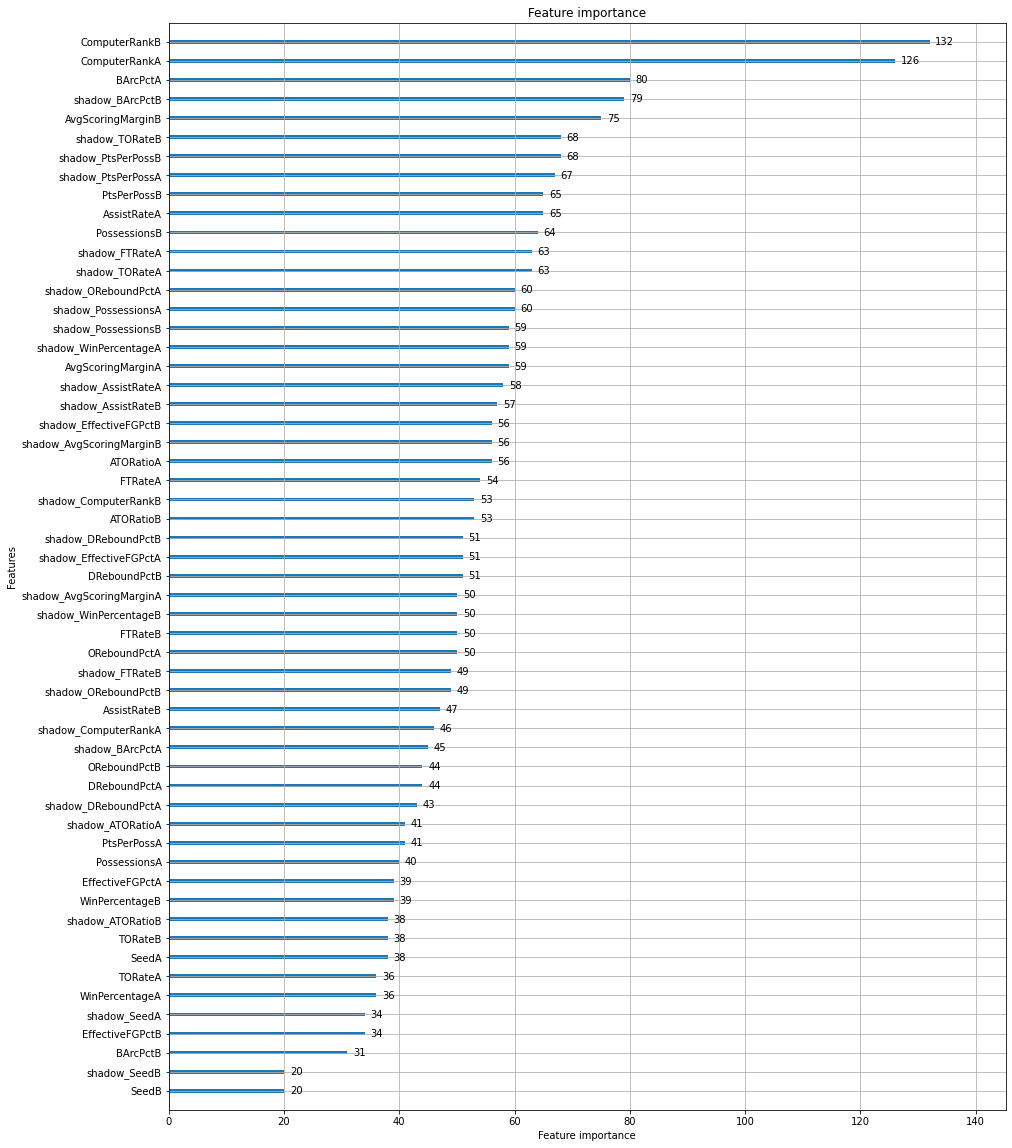

In [ ]:
# plot feature important
fig, ax = plt.subplots(1, 1, figsize=(15, 20)) 
lightgbm.plot_importance(lg, ax=ax)

In [ ]:

# buat function untuk memvalidasi data berdarkan season nya 

def kfold_by_season(df, alg, params, df_test_=None, plot=True, verbose=1):
    seasons = df['Season'].unique() 
    cvs = []
    pred_tests = []
    
    for season in seasons[12:]:
        if verbose:
            print(f'\nValidating on season {season}')
        
        df_train = df[df['Season'] < season].copy()
        df_val = df[df['Season'] == season].copy()
        df_test = df_test_.copy()      
         
        model = alg(**params, random_state = 42)             
        
        # khusus model lgbm, xgb, catboost
        #model.fit(df_train[features], df_train[target], eval_set = [(df_val[features], df_val[target])], verbose = 0, early_stopping_rounds = 100)
        
        # khusus selain model di atas
        model.fit(df_train[features], df_train[target]) 

        # predict validation data bersarkan season nya      
        pred = model.predict_proba(df_val[features])[:, 1]
        
        # predict test data bersarkan season nya
        if df_test is not None:
            pred_test = model.predict_proba(df_test[features])[:, 1]
                    
            pred_tests.append(pred_test)
        
        # plot probability
        if plot:
            plt.figure(figsize=(15, 6))
            sns.histplot(pred)
            plt.title("Probability", size = 20) 
            plt.show()

        # loss metrics
        loss = log_loss(df_val[target].values, pred)
        cvs.append(loss)

        if verbose:
            print(f'\t -> Scored of Logloss: {loss:.3f}')
            print(f"\t -> Train accuracy: {model.score(df_train[features], df_train[target])}")
            print(f"\t -> Validation accuracy: {model.score(df_val[features], df_val[target])}")
            
    # rata² dari log loss
    print(f'\n Local CV of Logloss is {np.mean(cvs):.3f}')
    
    return pred_tests

In [ ]:
# XGB

xgb_params = {"n_estimators": 2000, "max_depth": 1, "reg_lambda": 1e-2}
xgb_pred = kfold_by_season(df, XGBClassifier, xgb_params, df_test[features], plot=False)


Validating on season 2015
	 -> Scored of Logloss: 0.560
	 -> Train accuracy: 0.7108974358974359
	 -> Validation accuracy: 0.753731343283582

Validating on season 2016
	 -> Scored of Logloss: 0.563
	 -> Train accuracy: 0.7278630460448642
	 -> Validation accuracy: 0.7388059701492538

Validating on season 2017
	 -> Scored of Logloss: 0.553
	 -> Train accuracy: 0.7095185995623632
	 -> Validation accuracy: 0.7835820895522388

Validating on season 2018
	 -> Scored of Logloss: 0.594
	 -> Train accuracy: 0.7262996941896025
	 -> Validation accuracy: 0.6865671641791045

Validating on season 2019
	 -> Scored of Logloss: 0.571
	 -> Train accuracy: 0.7084923664122137
	 -> Validation accuracy: 0.746268656716418

Validating on season 2021
	 -> Scored of Logloss: 0.597
	 -> Train accuracy: 0.7331838565022422
	 -> Validation accuracy: 0.6818181818181818

 Local CV of Logloss is 0.573


In [ ]:
# LGBM

lgbm_params = {"n_estimators": 10000, "max_depth": 1}
lgbm_pred = kfold_by_season(df, LGBMClassifier, lgbm_params, df_test[features], plot=False)


Validating on season 2015
	 -> Scored of Logloss: 0.522
	 -> Train accuracy: 0.7224358974358974
	 -> Validation accuracy: 0.746268656716418

Validating on season 2016
	 -> Scored of Logloss: 0.549
	 -> Train accuracy: 0.7532467532467533
	 -> Validation accuracy: 0.7089552238805971

Validating on season 2017
	 -> Scored of Logloss: 0.533
	 -> Train accuracy: 0.7264770240700219
	 -> Validation accuracy: 0.753731343283582

Validating on season 2018
	 -> Scored of Logloss: 0.541
	 -> Train accuracy: 0.7716615698267074
	 -> Validation accuracy: 0.7014925373134329

Validating on season 2019
	 -> Scored of Logloss: 0.488
	 -> Train accuracy: 0.7294847328244275
	 -> Validation accuracy: 0.7164179104477612

Validating on season 2021
	 -> Scored of Logloss: 0.594
	 -> Train accuracy: 0.731390134529148
	 -> Validation accuracy: 0.6742424242424242

 Local CV of Logloss is 0.538


In [ ]:

# CatBoost

cb_params = {"depth": 1, "iterations": 10000}
cb_pred = kfold_by_season(df, CatBoostClassifier, cb_params, df_test[features], plot=False)


Validating on season 2015
	 -> Scored of Logloss: 0.525
	 -> Train accuracy: 0.7064102564102565
	 -> Validation accuracy: 0.753731343283582

Validating on season 2016
	 -> Scored of Logloss: 0.564
	 -> Train accuracy: 0.7249114521841794
	 -> Validation accuracy: 0.7089552238805971

Validating on season 2017
	 -> Scored of Logloss: 0.535
	 -> Train accuracy: 0.7138949671772429
	 -> Validation accuracy: 0.7388059701492538

Validating on season 2018
	 -> Scored of Logloss: 0.598
	 -> Train accuracy: 0.7176350662589195
	 -> Validation accuracy: 0.6716417910447762

Validating on season 2019
	 -> Scored of Logloss: 0.496
	 -> Train accuracy: 0.7189885496183206
	 -> Validation accuracy: 0.7089552238805971

Validating on season 2021
	 -> Scored of Logloss: 0.602
	 -> Train accuracy: 0.7143497757847533
	 -> Validation accuracy: 0.6742424242424242

 Local CV of Logloss is 0.553


In [ ]:
# HistGradientBoosting

hgbt_params = {"max_depth": 1, "l2_regularization": 1e-2}
hgbt_pred = kfold_by_season(df, HistGradientBoostingClassifier, hgbt_params, df_test[features], plot=False)


Validating on season 2015
	 -> Scored of Logloss: 0.539
	 -> Train accuracy: 0.7256410256410256
	 -> Validation accuracy: 0.7238805970149254

Validating on season 2016
	 -> Scored of Logloss: 0.561
	 -> Train accuracy: 0.7325855962219598
	 -> Validation accuracy: 0.7238805970149254

Validating on season 2017
	 -> Scored of Logloss: 0.532
	 -> Train accuracy: 0.7330415754923414
	 -> Validation accuracy: 0.7238805970149254

Validating on season 2018
	 -> Scored of Logloss: 0.596
	 -> Train accuracy: 0.7319062181447502
	 -> Validation accuracy: 0.6865671641791045

Validating on season 2019
	 -> Scored of Logloss: 0.489
	 -> Train accuracy: 0.7304389312977099
	 -> Validation accuracy: 0.7014925373134329

Validating on season 2021
	 -> Scored of Logloss: 0.598
	 -> Train accuracy: 0.7273542600896861
	 -> Validation accuracy: 0.6893939393939394

 Local CV of Logloss is 0.553


In [ ]:


# perbandingan 

"""
Model: xgboost

Season 2015 - 2021 
Cv 0.573
Lb 0.557

season 2016 - 2021
Cv 0.576
Lb 0.553

season 2017 - 2021
Cv 0.579
Lb 0.556


Model: LGBM

Season 2015 - 2021 
Cv 0.538
Lb 0.533

season 2016 - 2021
Cv 0.541
Lb 0.530

season 2017 - 2021
Cv 0.539
Lb 0.527


Catboost

Season 2015 - 2021 
Cv 0.553
Lb 0.549

season 2016 - 2021
Cv 0.559
Lb 0.547

season 2017 - 2021
Cv 0.558
Lb 0.546


HistGradientboost

Season 2015 - 2021 
Cv 0.553
Lb 0.546

season 2016 - 2021
Cv 0.555
Lb 0.540

season 2017 - 2021
Cv 0.554
Lb 0.539
"""

In [ ]:
# submission

In [ ]:
np.mean([np.mean(xgb_pred, 0), np.mean(lgbm_pred, 0), np.mean(cb_pred, 0), np.mean(hgbt_pred, 0)], 0)

array([0.68720997, 0.82759122, 0.62918056, ..., 0.47587355, 0.40404269,
       0.42758507])

In [ ]:

# blend semua prediksi
pred_test = np.mean([np.mean(xgb_pred, 0), np.mean(lgbm_pred, 0), np.mean(cb_pred, 0), np.mean(hgbt_pred, 0)], 0)
sub = df_test[['ID', 'Pred']].copy()
sub['Pred'] = pred_test
sub.to_csv('submission_27.csv', index=False)

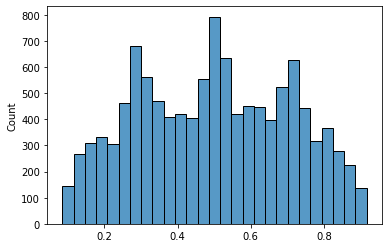

In [ ]:
sns.histplot(pred_test) # probability plot